In [1]:
import numpy as np
from numpy.random import choice
import pandas as pd
import random
from datetime import date
import datetime
import matplotlib.pyplot as plt
import os
from IPython.display import display, HTML

#sets are deduped and unordered, making them good for comparisons of distinct values...
#...(and just obtaining distinct values from a list)

#review all while loops to see if they can be smaller (as with title and topic selections)

In [2]:
def initialise_files():
    
    global filepath_prefix
    global quizzes
    global quizzes_idx
    global quiz_titles
    
    filepath_prefix = "C:/Documents/Python Programs (xlsx)/"
    
    if not os.path.exists(f"{filepath_prefix}"):
        os.makedirs(f"{filepath_prefix}")
        print(f'''
        Initialised {filepath_prefix}''')
        
    try:
        quizzes = pd.read_excel(f"{filepath_prefix}quizzes.xlsx")
    except:
        quizzes = pd.DataFrame([["Red Dwarf", "red dwarf", "red_dwarf_q_a", "red_dwarf_records"],
                                ["Peep Show", "peep show", "peep_show_q_a", "peep_show_records"]],
                        columns = ["quiz_title", "quiz_title_lower", "q_a_filepath", "records_filepath"])        
        quizzes.to_excel(f"{filepath_prefix}quizzes.xlsx",index=False)
        print(f'''
        Initialised {filepath_prefix}quizzes.xlsx''')
        
    try:
        pd.read_excel(f"{filepath_prefix}red_dwarf_q_a.xlsx")
    except:
        red_dwarf_q_a = pd.DataFrame(
        [[1, 'In which episode does the crew originally get wiped out?', 'The End', 'Series I'],
         [2, 'In which episode does Lister see that there will be twin boys on Red Dwarf?', 'Future Echoes', 'Series I'],
         [3, 'In which episode does Lister attempt to become a catering officer?', 'Balance of Power', 'Series I'],
         [4, 'In which episode does Rimmer recover a pod containing a "Quagaar warrior"?', 'Waiting for God', 'Series I'],
         [5, 'In which episode does Lister become ill, causing his hallucinations to manifest physically?', 'Confidence and Paranoia', 'Series I'],
         [6, 'In which episode does Rimmer move in with a duplicate hologram of himself?', 'Me2', 'Series I'],
         [7, 'In which episode do the crew discover an android looking after three skeletons on the Nova 5?', 'Kryten', 'Series II'],
         [8, 'In which episode do the crew take part in a total immersion video game?', 'Better Than Life', 'Series II'],
         [9, 'Which episode features Lise Yates?', 'Thanks for the Memory', 'Series II'],
         [10, 'In which episode do the crew travel back in time to before the crew were wiped out?', 'Stasis Leak', 'Series II'],
         [11, 'In which episode is the Red Dwarf taken over by the backup computer?', 'Queeg', 'Series II'],
         [12, 'In which episode does Lister become pregnant thanks to a female version of himself?', 'Parallel Universe', 'Series II'],
         [13, 'In which episode do Rimmer and Kryten form a double act?', 'Backwards', 'Series III'],
         [14, 'In which episode is Lister forced to eat dog food?', 'Marooned', 'Series III'],
         [15, 'In which episode is Lister attacked by a killer kebab?', 'Polymorph', 'Series III'],
         [16, 'In which episode does Lister almost blow up Red Dwarf by getting snacks?', 'Bodyswap', 'Series III'],
         [17, "In which episode do the crew steal Hitler's briefcase?", 'Timeslides', 'Series III'],
         [18, 'In which episode does Divadroid try to replace Kryten with Hudson 10?', 'The Last Day', 'Series III'],
         [19, "In which episode does Kryten go for a date at Parrot's?", 'Camille', 'Series IV'],
         [20, 'In which episode does Kryten briefly become human?', 'DNA', 'Series IV'],
         [21, 'In which episode does Rimmer get imprisoned for 1,169 counts of manslaughter?', 'Justice', 'Series IV'],
         [22, 'In which episode does Lister play pool with planets?', 'White Hole', 'Series IV'],
         [23, 'In which episode does Ace Rimmer make his first appearance?', 'Dimension Jump', 'Series IV'],
         [24, 'In which episode does Rimmer help Elvis, Einstein and Pythagoras defeat the Nazis?', 'Meltdown', 'Series IV'],
         [25, 'In which episode does Rimmer use a mindpatch?', 'Holoship', 'Series V'],
         [26, 'In which episode do Lister and Kryten almost get wiped from reality?', 'The Inquisitor', 'Series V'],
         [27, 'In which episode does Lister get attacked by a "taranshula" that is actually Kryten\'s hand?', 'Terrorform', 'Series V'],
         [28, 'In which episode does Lister learn to crochet?', 'Quarantine', 'Series V'],
         [29, 'In which episode does Lister get remote controlled by an evil version of the crew?', 'Demons and Angels', 'Series V'],
         [30, 'In which episode do the crew encounter the despair squid?', 'Back To Reality', 'Series V'],
         [31, 'In which episode does Kryten get put in the garbage compactor?', 'Psirens', 'Series VI'],
         [32, 'In which episode does Rimmer gain a hard light drive?', 'Legion', 'Series VI'],
         [33, 'In which episode does Kryten become a Sheriff?', 'Gunmen of the Apocalypse', 'Series VI'],
         [34, 'In which episode does Lister marry a Gelf?', 'Polymorph II - Emohawk', 'Series VI'],
         [35, 'In which episode does Rimmer get some Chinese worry balls?', 'Rimmerworld', 'Series VI'],
         [36, 'In which episode do the crew come into conflict with their future selves?', 'Out of Time', 'Series VI'],
         [37, 'In which episode do the crew help assassinate JFK?', 'Tikka to Ride', 'Series VII'],
         [38, 'In which episode does Ace Rimmer return to train his replacement?', 'Stoke Me a Clipper', 'Series VII'],
         [39, "In which episode does Lister discover he's his own father?", 'Ouroboros', 'Series VII'],
         [40, 'In which episode do the crew go crawling through the Starbug vents?', 'Duct Soup', 'Series VII'],
         [41, "In which episode does Lister learn that he's been missing Rimmer?", 'Blue', 'Series VII'],
         [42, "In which episode does Lister's desire for ketchup destroy Kryten's head?", 'Beyond a Joke', 'Series VII'],
         [43, 'In which episode does Lister lose his arm to a virus?', 'Epideme', 'Series VII'],
         [44, 'In which episode do the crew track down the nanobots?', 'Nanarchy', 'Series VII'],
         [45, 'In which episode do the crew arrive on the resurrected Red Dwarf?', 'Back in the Red: Part 1', 'Series VIII'],
         [46, 'In which episode does Rimmer use confidential files to try and become an officer?', 'Back in the Red: Part 2', 'Series VIII'],
         [47, 'In which episode are the crew given a two-year prison sentence?', 'Back in the Red: Part 3', 'Series VIII'],
         [48, 'In which episode do the crew discover a computer that can see the future?', 'Cassandra', 'Series VIII'],
         [49, 'In which episode does Kryten launch a TV station?', 'Krytie TV', 'Series VIII'],
         [50, 'In which episode are Lister and Rimmer sent to the hole?', 'Pete: Part 1', 'Series VIII'],
         [51, 'In which episode do the crew accidentally create a dinosaur?', 'Pete: Part 2', 'Series VIII'],
         [52, 'In which episode does a chameleonic virus nearly destroy the Red Dwarf?', 'Only the Good', 'Series VIII'],
         [53, "In which episode does Rimmer convince his brother he's a Space Corps captain?", 'Trojan', 'Series X'],
         [54, 'In which episode does Lister receive video messages from his "father"?', 'Fathers and Suns', 'Series X'],
         [55, 'In which episode do the crew meet Jesus?', 'Lemons', 'Series X'],
         [56, 'In which episode does Lister get strapped to a groinal exploder?', 'Entangled', 'Series X'],
         [57, 'In which episode does Lister learn he may have been a father?', 'Dear Dave', 'Series X'],
         [58, 'In which episode does Rimmer discover he was adopted?', 'The Beginning', 'Series X'],
         [59, 'In which episode do evil simulants attempt a "Hackneyed old cliche"?', 'Twentica', 'Series XI'],
         [60, 'In which episode do the crew discover a crash caused by a Karma drive?', 'Samsara', 'Series XI'],
         [61, "In which episode do the crew perform a time heist on Lister's kidneys?", 'Give and Take', 'Series XI'],
         [62, 'In which episode does a bio-printed captain promote Rimmer?', 'Officer Rimmer', 'Series XI'],
         [63, 'In which episode do the crew discover a very successful android?', 'Krysis', 'Series XI'],
         [64, 'In which episode does Cat get pregnant?', 'Can of Worms', 'Series XI'],
         [65, 'In which episode does Lister jam with robot Hitler?', 'Cured', 'Series XII'],
         [66, "In which episode do the crew all learn what it's like to be androids?", 'Siliconia', 'Series XII'],
         [67, 'In which episode do the crew get jailed for criticising?', 'Timewave', 'Series XII'],
         [68, 'In which episode do Rimmer and Kryten run for Machine President?', 'Mechocracy', 'Series XII'],
         [69, 'In which episode does Lister pay the price for capitalism?', 'M-Corp', 'Series XII'],
         [70, 'In which episode does Rimmer search for a better universe?', 'Skipper', 'Series XII']],
                columns = ["QID", "Question", "Answer", "Topic"])      
        red_dwarf_q_a.set_index("QID")
        red_dwarf_q_a.to_excel(f"{filepath_prefix}red_dwarf_q_a.xlsx",index=True)
        print(f'''
        Initialised {filepath_prefix}red_dwarf_q_a.xlsx''')
        
    try:
        pd.read_excel(f"{filepath_prefix}peep_show_q_a.xlsx")
    except:
        peep_show_q_a = pd.DataFrame(
        [[1, 'In which episode does Mark get bullied by children?', 'Warring Factions', 'Series 1'],
         [2, 'In which episode does Jeremy gurn at his JLB interview?', 'The Interview', 'Series 1'],
         [3, 'In which episode does Mark meet Valerie at a party?', 'On the Pull', 'Series 1'],
         [4, 'In which episode does Mark develop feelings for Alan Johnson?', 'Mark Makes a Friend', 'Series 1'],
         [5, 'In which episode does Jeremy work at a music studio?', 'Dream Job', 'Series 1'],
         [6, 'In which episode does Mark first kiss Sophie?', 'Funeral', 'Series 1'],
         [7, 'In which episode do the flatmates attend Rainbow Rhythms?', 'Dance Class', 'Series 2'],
         [8, 'In which episode does Mark staple a sausage to a door?', 'Jeremy Makes It', 'Series 2'],
         [9, 'In which episode is the flatmates\' "picnic" ruined by cameras?', 'Local Hero', 'Series 2'],
         [10, 'In which episode does Mark stalk a shop assistant?', 'University Challenge', 'Series 2'],
         [11, 'In which episode do Mark and Sophie watch Das Boot?', 'The Man Show', 'Series 2'],
         [12, 'In which episode does Jeremy help Nancy with her visa?', 'Wedding', 'Series 2'],
         [13, "In which episode does Mark have to use a lady's voice?", 'Mugging', 'Series 3'],
         [14, 'In which episode do Jeremy and Hans start to set up a pub?', 'Sectioning', 'Series 3'],
         [15, 'In which episode is Mark almost forced to poo in a paper bag?', 'Shrooming', 'Series 3'],
         [16, "In which episode does Jeremy meet Mark's sister?", 'Sisterning', 'Series 3'],
         [17, 'In which episode do the flatmates go to a gay club?', 'Jurying', 'Series 3'],
         [18, 'In which episode do the flatmates get lost on the moors?', 'Quantocking', 'Series 3'],
         [19, 'In which episode does Mark behead a pheasant?', "Sophie's Parents", 'Series 4'],
         [20, 'In which episode does Mark get an angry lapdance?', 'Conference', 'Series 4'],
         [21, 'In which episode does someone poo in a pool?', 'Gym', 'Series 4'],
         [22, 'In which episode do the flatmates visit a safari park?', 'Handyman', 'Series 4'],
         [23, 'In which episode do the flatmates burn a dead dog?', 'Holiday', 'Series 4'],
         [24, 'In which episode does Jeremy pee himself in church?', 'The Wedding', 'Series 4'],
         [25, 'In which episode do the flatmates go on a double date?', 'Burgling', 'Series 5'],
         [26, 'In which episode does Barnie join the band?', 'Spin War', 'Series 5'],
         [27, 'In which episode does Saz move into the flat?', 'Jeremy Broke', 'Series 5'],
         [28, 'In which episode does Gunny appear?', "Jeremy's Mummy", 'Series 5'],
         [29, 'In which episode does Mark smash a crystal skull?', "Jeremy's Manager", 'Series 5'],
         [30, 'In which episode does Mark go LARPing?', "Mark's Women", 'Series 5'],
         [31, 'In which episode does Mark relaunch the satire boom?', 'Jeremy at JLB', 'Series 6'],
         [32, 'In which episode does Mark provide the dips?', 'The Test', 'Series 6'],
         [33, "In which episode does Mark borrow Jen's laptop?", 'Jeremy in Love', 'Series 6'],
         [34, "In which episode does Mark start work at Amigo's", 'The Affair', 'Series 6'],
         [35, 'In which episode do the flatmates have a party?', 'The Party', 'Series 6'],
         [36, 'In which episode does Sophie go into labour?', 'Das Boot', 'Series 6']],
                columns = ["QID", "Question", "Answer", "Topic"])      
        peep_show_q_a.set_index("QID")
        peep_show_q_a.to_excel(f"{filepath_prefix}peep_show_q_a.xlsx",index=True)
        print(f'''
        Initialised {filepath_prefix}peep_show_q_a.xlsx''')
        
        quizzes_idx = quizzes.set_index("quiz_title")
        quiz_titles = quizzes["quiz_title"].to_list()

In [3]:
def add_accents(x1):
    
    global word_output
    
    word_input = x1
    
    accents_dict = {'a1': 'ā', 'a2': 'á', 'a3': 'ǎ', 'a4': 'à', 'e1': 'ē', 'e2': 'é', 'e3': 'ě', 'e4': 'è',
                    'i1': 'ī', 'i2': 'í', 'i3': 'ǐ', 'i4': 'ì', 'o1': 'ō', 'o2': 'ó', 'o3': 'ǒ', 'o4': 'ò',
                    'u1': 'ū', 'u2': 'ú', 'u3': 'ǔ', 'u4': 'ù', 'u5': 'ǖ', 'u6': 'ǘ', 'u7': 'ǚ', 'u8': 'ǜ'}
    
    accents_input_list = accents_dict.keys()
    
    distinct_accents_added = 0
    
    for input_string in accents_input_list:   
        if input_string in word_input:
            distinct_accents_added = distinct_accents_added + 1
            output_string = accents_dict[input_string]
            word_output = word_input.replace(input_string, output_string)
            word_input = word_output
    
    if distinct_accents_added == 0:
        word_output = word_input
#     else:
#         print(f'''
#         {word_output}''')

In [4]:
def topic_selection(aa, jj, mm):
    
    global topic_choice
    
    q_a_filepath = aa

    sentence = jj
    
    exemption = mm
    
    quiz_data = pd.read_excel(f"{q_a_filepath}")
    topic_list = list(quiz_data["Topic"])
    
    topic_list = [str(i) for i in topic_list]
    topic_list = list(dict.fromkeys(topic_list))
    
    topic_list_num = [topic_list[i] for i in range(0, len(topic_list))]
    topic_num_dict = {i:topic_list[i] for i in range(0, len(topic_list))}
    
    topic_list_lower = [i.lower() for i in topic_list]
    topic_lower_dict = {z.lower():z for z in topic_list}
    
    topic_list_series = pd.DataFrame(topic_list, columns=["Topics"])
    display(HTML(topic_list_series.to_html()))
    
    topic_choice_input = input(f'''
    {sentence}
    ''')   
            
    while True:
        try:
            topic_choice_input = int(topic_choice_input)
            try:
                topic_choice = topic_num_dict[topic_choice_input]#.lower()
            except:
                topic_choice_input = input(f'''
                Sorry I didn't understand that
                {sentence}
                ''')                
                continue
            break
        except:
            if topic_choice_input.lower() in topic_list_lower:
                topic_choice = topic_lower_dict[topic_choice_input.lower()]#.lower()
                break
            elif topic_choice_input.lower() == exemption:
                topic_choice = topic_choice_input.lower()
                break
            else:
                topic_choice_input = input(f'''
                Sorry I didn't understand that
                {sentence}
                ''')  
                continue
    
    if exemption == "new" and topic_choice == "new":
        topic_choice = input(f'''
        New Topic:
        ''')

In [5]:
def import_records(z):
    
    global q_a_filepath
    global q_a_filepath_suffix
    global records_filepath
    global records
    global quizzes
    global quizzes_idx
    global quiz_titles
    global quiz_choice_lower
    
    quizzes = pd.read_excel(f"{filepath_prefix}quizzes.xlsx")
    quizzes_idx = quizzes.set_index("quiz_title")
    quiz_titles = quizzes["quiz_title"].to_list()
    
    verb = z

    quiz_titles_series = pd.DataFrame(quiz_titles, columns=["Quizzes"])
    display(HTML(quiz_titles_series.to_html())) 
    
    quiz_choice_lower = input(f'''
    Which quiz would you like to {z}? (Enter name)
    ''').lower()  
    
    while quiz_choice_lower not in list(quizzes["quiz_title_lower"]):
        
#         print('''
#         Sorry, that quiz is not available
#         Enter a title from the list''')
#         quiz_choice_lower = input(f'''
#         ''').lower()
        
        quiz_choice_lower = input(f'''
        Sorry, that quiz is not available
        Enter a title from the list
        ''').lower()
        
        continue
    else:
        pass

    quizzes_cut = quizzes_idx[quizzes_idx["quiz_title_lower"] == quiz_choice_lower]
    quizzes_cut_lower_idx = quizzes_cut.set_index("quiz_title_lower")

    quizzes_q_a_dict = quizzes_cut_lower_idx.to_dict()["q_a_filepath"]
    quizzes_records_dict = quizzes_cut_lower_idx.to_dict()["records_filepath"]

    q_a_filepath_suffix = quizzes_q_a_dict[quiz_choice_lower]
    q_a_filepath = f"{filepath_prefix}{q_a_filepath_suffix}.xlsx"
    records_filepath_suffix = quizzes_records_dict[quiz_choice_lower]
    records_filepath = f"{filepath_prefix}{records_filepath_suffix}.xlsx"
    #print(records_filepath)
    
    try:
        records = pd.read_excel(f"{records_filepath}")
    except:
        if True:
            try:
                del records
                #print("deleting other records")
            except:
                pass
                #print("no records exist yet, doing nothing")
    else:
        records = pd.read_excel(f"{records_filepath}")
        #print(records)
        #print("reading in old records")
            
    #print(records)

In [6]:
def play_quiz(x):
    
    global records
    global topic

    name_title = x
    
    import_records("play")
    
    play_loops = 0
    
    play_again = ""
    
    while play_again not in ["no","n"]:
    
        if play_loops == 0 or play_again in ["yes","y",""]:
    
            ############################################################################################## 

            quiz_data = pd.read_excel(f"{q_a_filepath}")
            quiz_data_idx = quiz_data.set_index("QID")
            
            records = pd.read_excel(f"{records_filepath}")
            
            #########################################################################
            # Give topic choice -- cut data accordingly -- create dicts/list/variable
            #########################################################################

            topic_selection(q_a_filepath, "Select a topic (name/no.) or enter all:", "all")

        #     print(topic_choice)

            if topic_choice == "all":
                quiz_data_cut = quiz_data_idx
            else:
                if quiz_data_idx["Topic"].dtypes == "int64":
                    quiz_data_cut = quiz_data_idx[quiz_data_idx["Topic"] == int(topic_choice)]
                else:
                    quiz_data_cut = quiz_data_idx[quiz_data_idx["Topic"].str.lower() == topic_choice.lower()]

            quiz_data_question_dict = quiz_data_cut.to_dict()["Question"]
            quiz_data_answer_dict = quiz_data_cut.to_dict()["Answer"]
            quiz_data_topic_dict = quiz_data_cut.to_dict()["Topic"]

        #     display(HTML(quiz_data_cut.to_html()))

            question_list = quiz_data_cut.index.tolist()
        #     question_list = quiz_data.index.to_list()

            #question_list = list(quiz_data_answer_dict.keys())
            question_list_count = len(question_list)
            
            total_quiz_length = len(quiz_data.index.tolist())
            
            ############################################################################
            # Offer validated quiz length -- define quiz start time -- initialise scores
            ############################################################################

        #     print(f'''
        #     How many questions would you like on {topic_choice}? (1-{question_list_count})''')            

            quiz_length_menu = f"How many questions would you like on {topic_choice}? (1-{question_list_count})"

            while True:
                try:
                    quiz_length = int(input(f'''
                    {quiz_length_menu}
                    '''))
                except ValueError or quiz_length < 1 or quiz_length > question_list_count:
                    quiz_length_menu = f'''Sorry, I didn't understand that
                    How many questions would you like on {topic_choice}? (1-{question_list_count})'''
                    continue
                if quiz_length < 1 or quiz_length > question_list_count:
                    quiz_length_menu = f'''Sorry, the quiz must include 1 to {question_list_count} questions
                    How many questions would you like on {topic_choice}?'''
                    continue
                else:
                    print(f'''
                    Excellent! Running {quiz_length} questions''')
                    break            

            now = datetime.datetime.now()
            year = now.year
            month = f"{now.month:02d}"
            day = f"{now.day:02d}"
            hour = f"{now.hour:02d}"
            minute = f"{now.minute:02d}"
            second = f"{now.second:02d}"
            quiz_start_time = f"{day}-{month}-{year} {hour}.{minute}.{second}"

            score = 0
            passes = 0
            incorrect = 0

            ######################################################################
            # Import records for name_title, calculate ask_chances and production final_question_list
            ######################################################################

            try:
                my_records = records[records["name_title"] == name_title]

                all_my_recent_records = my_records.tail(total_quiz_length)
                
                all_my_correct_records = my_records[my_records["result"] == "correct"]
                all_my_incorrect_pass_records = my_records[my_records["result"].isin(["incorrect","pass"])]
                
                all_my_recent_correct_records = all_my_recent_records[all_my_recent_records["result"] == "correct"]
                all_my_recent_incorrect_pass_records = all_my_recent_records[all_my_recent_records["result"].isin(["incorrect","pass"])]
                
                all_my_last_10_records = []
                all_my_last_1_record = []
                
                for QID in question_list:
                    my_last_10_records = my_records[my_records["QID"] == QID].tail(10)
                    my_last_10_records = my_last_10_records.values.tolist()
                    all_my_last_10_records = all_my_last_10_records + my_last_10_records
                    
                    my_last_1_record = my_records[my_records["QID"] == QID].tail(1)
                    my_last_1_record = my_last_1_record.values.tolist()
                    all_my_last_1_record = all_my_last_1_record + my_last_1_record
                
                all_my_last_10_records = pd.DataFrame(all_my_last_10_records, columns = ["answer_time", "name_title",
                   "quiz_start_time", "subset_choice", "question_list_count", "quiz_length", "topic", "question_no", 
                   "QID", "question", "answer", "user_answer", "result"])
                
                all_my_last_10_correct_records = all_my_last_10_records[all_my_last_10_records["result"] == "correct"]
                all_my_last_10_incorrect_pass_records = all_my_last_10_records[all_my_last_10_records["result"].isin(["incorrect","pass"])]
                
                all_my_last_1_record = pd.DataFrame(all_my_last_1_record, columns = ["answer_time", "name_title",
                   "quiz_start_time", "subset_choice", "question_list_count", "quiz_length", "topic", "question_no", 
                   "QID", "question", "answer", "user_answer", "result"])  
                
                all_my_last_1_record = all_my_last_1_record.set_index("QID")
                all_my_last_1_record_dict = all_my_last_1_record.to_dict()["result"]

#                 display(HTML(all_my_last_10_records.to_html()))
            
                exists = 1
            except:
                exists = 0

            x_values = []
            y_values = []
            scores = []

            for QID in question_list:

                question = quiz_data_question_dict[QID]
                
                try:
                    last_result = all_my_last_1_record_dict[QID]
                except:
                    last_result = "-"

                if exists == 1:
#                     my_correct_records = all_my_correct_records[all_my_correct_records["QID"] == QID]
#                     my_correct_records_question = my_correct_records["QID"]
#                     correct = 0 + len(my_correct_records_question)

#                     my_incorrect_pass_records = all_my_incorrect_pass_records[all_my_incorrect_pass_records["QID"] == QID]
#                     my_incorrect_pass_records_question = my_incorrect_pass_records["QID"]        
#                     incorrect_pass = 0 + len(my_incorrect_pass_records_question)

#                     total_asked = incorrect_pass + correct
                    
                    my_correct_records = all_my_last_10_correct_records[all_my_last_10_correct_records["QID"] == QID]
                    my_correct_records_question = my_correct_records["QID"]
                    correct = 0 + len(my_correct_records_question)

                    my_incorrect_pass_records = all_my_last_10_incorrect_pass_records[all_my_last_10_incorrect_pass_records["QID"] == QID]
                    my_incorrect_pass_records_question = my_incorrect_pass_records["QID"]        
                    incorrect_pass = 0 + len(my_incorrect_pass_records_question)

                    total_asked = incorrect_pass + correct
                    
                    my_recent_correct_records = all_my_recent_correct_records[all_my_recent_correct_records["QID"] == QID]
                    my_recent_correct_records_question = my_recent_correct_records["QID"]
                    recent_correct = 0 + len(my_recent_correct_records_question)

                    my_recent_incorrect_pass_records = all_my_recent_incorrect_pass_records[all_my_recent_incorrect_pass_records["QID"] == QID]
                    my_recent_incorrect_pass_records_question = my_recent_incorrect_pass_records["QID"]        
                    recent_incorrect_pass = 0 + len(my_recent_incorrect_pass_records_question)

                    recent_total_asked = recent_incorrect_pass + recent_correct
                else:
                    correct = 0
                    incorrect_pass = 0
                    total_asked = 0
                    incorrect_pass_rate = "missing"
                    recent_correct = 0
                    recent_incorrect_pass = 0
                    recent_total_asked = 0
                    recent_incorrect_pass_rate = ""
                    
                if total_asked > 0 and incorrect_pass > 0:
                    incorrect_pass_rate = (incorrect_pass / total_asked) * 100
                elif total_asked > 0 and incorrect_pass == 0:
                    incorrect_pass_rate = 0
                else:
                    incorrect_pass_rate = ""

                if recent_total_asked > 0 and recent_incorrect_pass > 0:
                    recent_incorrect_pass_rate = (recent_incorrect_pass / recent_total_asked) * 100
                elif recent_total_asked > 0 and recent_incorrect_pass == 0:
                    recent_incorrect_pass_rate = 0
                else:
                    recent_incorrect_pass_rate = ""
                  
                if total_asked == 0:
                    ask_chances = 1000000
                elif last_result in ["incorrect","pass"]:
                    ask_chances = 100000
                elif total_asked < 3 or recent_total_asked == 0:
                    ask_chances = 0.05 * (incorrect_pass_rate ** 2) + 50
                elif total_asked >= 3 and incorrect_pass_rate > 0 and recent_total_asked > 0:
                    ask_chances = 0.05 * (incorrect_pass_rate ** 2) + 10
                elif total_asked >= 3 and incorrect_pass_rate == 0 and recent_total_asked > 0:
                    ask_chances = 10
                else:
                    ask_chances = 10

                row = [QID, question, incorrect_pass, correct, total_asked, incorrect_pass_rate, 
                       recent_incorrect_pass, recent_correct, recent_total_asked, recent_incorrect_pass_rate, 
                       last_result, ask_chances]

                scores.append(row)
                x_values.append(incorrect_pass_rate)
                y_values.append(ask_chances)

        #         print(scores)

            scores_df = pd.DataFrame(scores, columns = ["QID", "question", "incorrect_pass", "correct", "total_asked",
                                                        "incorrect_pass_rate", "recent_incorrect_pass", "recent_correct",
                                                        "recent_total_asked", "recent_incorrect_pass_rate", "last_result", 
                                                        "ask_chances"])
            scores_df = scores_df.set_index("QID")
            display(HTML(scores_df.to_html()))

            ask_chances_list = scores_df["ask_chances"].tolist()
            sum_ask_chances = sum(ask_chances_list)
            ask_chances_list = [i/sum_ask_chances for i in ask_chances_list]

            final_question_list = choice(question_list, quiz_length, p=ask_chances_list, replace=False)
            final_question_list = list(final_question_list)

#             print(final_question_list)    

            #########################################################################################################
            # loop through asking and marking each question
            #########################################################################################################

            question_no = 0

            incorrect_pass_table = []

            for QID in final_question_list:

                question = quiz_data_question_dict[QID]
                answer = quiz_data_answer_dict[QID]
                topic = quiz_data_topic_dict[QID]

                if isinstance(answer, int):    
                    answer_lower = answer
                else:
                    answer_lower = answer.lower()

                question_no = question_no+1

                user_answer = input(f'''
                {question_no} of {quiz_length}:
                {question}

                ''')

                add_accents(user_answer)
                user_answer = word_output

                if isinstance(answer, int):
                    try:
                        user_answer_lower = int(user_answer)
                    except:               
                        user_answer_lower = user_answer
                else:
                    user_answer_lower = user_answer.lower()

                now_2 = datetime.datetime.now()
                year_2 = now_2.year
                month_2 = f"{now_2.month:02d}"
                day_2 = f"{now_2.day:02d}"
                hour_2 = f"{now_2.hour:02d}"
                minute_2 = f"{now_2.minute:02d}"
                second_2 = f"{now_2.second:02d}"
                answer_time = f"{day_2}-{month_2}-{year_2} {hour_2}.{minute_2}.{second_2}"

                if user_answer_lower == answer_lower:
                    print('''
                    Correct!''')
                    result = "correct"
                    score = score + 1
                elif user_answer_lower == "pass":
                    print(f'''
                    Pass. The answer is {answer}''')
                    result = "pass"
                    passes = passes + 1         
                else:
                    print(f'''
                    Incorrect. The answer is {answer}''')
                    result = "incorrect"
                    incorrect = incorrect + 1

                ##############################################################################
                # Initialise records with first result if non-existent -- or append new result
                ##############################################################################                    

                new_row = [answer_time, name_title, quiz_start_time, topic_choice, question_list_count, quiz_length, 
                           topic, question_no, QID, question, answer, user_answer, result]

                if 'records' in globals():
                    #print("appending new records to old")
                    new_row_series = pd.Series(new_row, index = records.columns)
                    records = records.append(new_row_series, ignore_index=True)
                else:
                    #print("overwriting old records")
                    records = pd.DataFrame([[answer_time, name_title, quiz_start_time, topic_choice, question_list_count,
                    quiz_length, topic, question_no, QID, question, answer, user_answer, result]],
                    columns = ["answer_time", "name_title", "quiz_start_time", "subset_choice", "question_list_count",
                    "quiz_length", "topic", "question_no", "QID", "question", "answer", "user_answer", "result"])
                    records.to_excel(f"{records_filepath}",index=False)            

                if result in ["incorrect","pass"]:
                    incorrect_pass_row = [question_no, question, answer, result]
                    incorrect_pass_table.append(incorrect_pass_row)

            ######################################################################################
            # Give quiz results -- offer to play again -- write records or skip if quiz not played
            ######################################################################################

            incorrect_pass_df = pd.DataFrame(incorrect_pass_table, columns = ["#","Question","Answer", "Result"])
            incorrect_pass_df = incorrect_pass_df.set_index("#")

            passes_and_incorrect = f"You had {passes} passes and {incorrect} incorrect answers"

            if score == quiz_length:
                print(f'''
                Amazing! You got all {quiz_length} questions right!
                I know what you\'ve been watching during lockdown ;)''')
            elif score/quiz_length > 0.6:
                print(f'''
                Well done! You scored {score} out of {quiz_length} points!
                {passes_and_incorrect}''')
                display(HTML(incorrect_pass_df.to_html()))
            elif score/quiz_length > 0.3:
                print(f'''
                Could have been worse! You scored {score} out of {quiz_length} points!
                {passes_and_incorrect}''')
                display(HTML(incorrect_pass_df.to_html()))
            else:
                print(f'''
                Better luck next time! This time you only scored {score} out of {quiz_length} points!
                {passes_and_incorrect}''')
                display(HTML(incorrect_pass_df.to_html()))
            
            play_loops = play_loops + 1
            
            records.to_excel(f"{records_filepath}",index=False)

            play_again = input(f'''
            Would you like to play again? (Yes/No or Enter for yes)
            ''').lower()  

            ##############################################################################################
    
        else:
            play_again = input(f'''
            Sorry, I didn't understand that
            Would you like to play again?
            ''').lower()  
    else:
        records.to_excel(f"{records_filepath}",index=False)

In [7]:
def add_question(aa, bb, ff):
    
    global quiz_data
    global topic_choice
    
    new_q_a_filepath = aa
    
    outer_function = bb
    
    records_filepath = ff
    
    if outer_function == "edit":
        quiz_data = pd.read_excel(f"{q_a_filepath}")
#         print(quiz_data)
        quiz_data = quiz_data.set_index("QID")
#         display(HTML(quiz_data.to_html()))
    
    questions_so_far = 0
    another_question_lower = ""
    
    add_question_menu = "Would you like to add another question? (Yes/No or Enter for Yes)"
    
    while another_question_lower not in ["no","n"]:
        
        if questions_so_far == 0 or another_question_lower in ["yes","y",""]:
            
            if outer_function == "new" and questions_so_far == 0:
                new_QID = 1
            else:
                try:
                    records = pd.read_excel(f"{records_filepath}")
                    QID_list = quiz_data.index.to_list() + records["QID"].to_list
                except:
                    QID_list = quiz_data.index.to_list()
                new_QID = max(QID_list) + 1
            
            new_question = input(f'''
            Question: 
            ''')
            add_accents(new_question)
            new_question = word_output
            
            new_answer = input(f'''
            Answer: 
            ''')
            add_accents(new_answer)
            new_answer = word_output
            
            if questions_so_far == 0 and outer_function == "new":
                topic_choice = input(f'''
                New Topic:
                ''')
            else:
                topic_selection(f"{filepath_prefix}{new_q_a_filepath}.xlsx", "Topic (select from list or enter new):", "new")
            
            add_accents(topic_choice)
            new_topic = word_output
            
            if questions_so_far == 0 and bb == "new":
                quiz_data = pd.DataFrame([[new_QID, new_question, new_answer, new_topic]],
                                  columns = ["QID", "Question", "Answer", "Topic"])
                print(f'''created DF
                {quiz_data}''')
            else:
                new_question_record = [new_QID, new_question, new_answer, new_topic]
#                 print(f'''made new row
#                 {new_question_record}''')
                
                quiz_data = pd.read_excel(f"{filepath_prefix}{new_q_a_filepath}.xlsx")
#                 print(f'''read quiz data
#                 {quiz_data}''') 
                
                quiz_data = quiz_data.values.tolist()
#                 print(f'''converted to lol
#                 {quiz_data}''')
                
                quiz_data.append(new_question_record)
#                 print(f'''appended new row
#                 {quiz_data}''')
                
                quiz_data = pd.DataFrame(quiz_data, columns = ["QID", "Question", "Answer", "Topic"])
#                 print(f'''converted to DF
#                 {quiz_data}''')               
                
            quiz_data = quiz_data.set_index("QID")
#             print("indexed on QID")
            quiz_data.to_excel(f"{filepath_prefix}{new_q_a_filepath}.xlsx",index=True)
#             print("written to excel")
            
            questions_so_far = questions_so_far + 1        
            display(HTML(quiz_data.to_html()))
            another_question_lower = input(f'''
            {add_question_menu}
            ''').lower()  
        else:
            another_question_lower = input(f'''
            Sorry, I didn't understand that
            {add_question_menu}
            ''').lower()  
    else:
        quiz_data.to_excel(f"{filepath_prefix}{new_q_a_filepath}.xlsx",index=True)

In [8]:
def create_quiz(y):
    
    quizzes = y
    
    new_quiz_title = input(f'''
    What is the title of your new quiz? 
    ''')
    
    add_accents(new_quiz_title)
    new_quiz_title = word_output

    new_quiz_title_lower = new_quiz_title.lower()
    new_quiz_title_lower_ = new_quiz_title_lower.replace(" ", "_")
    new_q_a_filepath = new_quiz_title_lower_ + "_q_a"
    new_records_filepath = new_quiz_title_lower_ + "_records"

    new_quiz_row = [new_quiz_title, new_quiz_title_lower, new_q_a_filepath, new_records_filepath]
    new_quiz_row_series = pd.Series(new_quiz_row, index = quizzes.columns)
    quizzes = quizzes.append(new_quiz_row_series, ignore_index=True)

    quizzes.to_excel(f"{filepath_prefix}quizzes.xlsx",index=False)

    #####################################################################################
    # Ask for first question -- initialise questions data -- loop through extra questions
    #####################################################################################
    
    records_filepath = new_records_filepath
    
    add_question(new_q_a_filepath, "new", records_filepath)

In [9]:
def edit_question(aa):
    
    global quiz_data
    
    q_a_filepath = aa
    
    quiz_data = pd.read_excel(f"{q_a_filepath}")
    quiz_data = quiz_data.set_index("QID")
    
    edit_question_menu = "Which row would you like to edit? (Enter QID)"
    edit_question_menu_2 = "Would you like to modify the Question, Answer or Topic?"
    edit_question_menu_3 = "Would you like to make another edit to this row? (Yes/No or Enter for No)"
    
    index_to_modify = input(f'''
    {edit_question_menu}
    ''')
    
    while True:
        try:
#             quiz_data.index.tolist().remove(index_to_modify)
            index_to_modify = int(index_to_modify)
            if index_to_modify in quiz_data.index.tolist():
                pass
            else:
                index_to_modify = input(f'''
                Sorry that wasn't possible
                {edit_question_menu}
                ''')
                continue
            row_to_edit = quiz_data[quiz_data.index == index_to_modify]
            row_to_edit = pd.DataFrame(row_to_edit, columns=["Question","Answer","Topic"])               
            display(HTML(row_to_edit.to_html()))   
            break
        except:
            index_to_modify = input(f'''
            Sorry that wasn't possible
            {edit_question_menu}
            ''')
            continue
    
    row_modifications_made = 0
    
    while row_modifications_made == 0 or another_row_modification_lower not in ["no","n",""]:

        if row_modifications_made == 0 or another_row_modification_lower in ["yes","y"]:
            
            column_to_modify = input(f'''
            {edit_question_menu_2}
            ''')

            while True:
                if column_to_modify.lower() in ["question","q"]:
                    column = "Question"
                    break
                elif column_to_modify.lower() in ["answer","a"]:
                    column = "Answer"
                    break
                elif column_to_modify.lower() in ["topic","t"]:
                    column = "Topic"
                    break
                else:
                    column_to_modify = input(f'''
                    Sorry, I didn't understand that
                    {edit_question_menu_2}
                    ''')
            else:
                pass
            
            if column in ["Question","Answer"]:
                new_cell = input(f'''
                New {column}
                ''')
            else:
                topic_selection(q_a_filepath, "Select a topic (name/num) or enter new:", "new")
                new_cell = topic_choice
            
            add_accents(new_cell)
            new_cell = word_output
            
            #print(quiz_data.loc[ index_to_modify , column ])
            quiz_data.loc[ index_to_modify , column ] = new_cell
            #print(quiz_data.loc[ index_to_modify , column ])
            
            
            row_to_edit = quiz_data[quiz_data.index == index_to_modify]
            
            row_to_edit = pd.DataFrame(row_to_edit, columns=["Question","Answer","Topic"])            
            
            display(HTML(row_to_edit.to_html()))

            
            
            quiz_data.to_excel(f"{q_a_filepath}",index=True)

            row_modifications_made = row_modifications_made + 1
            
            another_row_modification_lower = input(f'''
            {edit_question_menu_3}
            ''').lower()
        
        elif another_row_modification_lower in ["no","n"]:
            break
        
        else:
            another_row_modification_lower = input(f'''
            Sorry I didn't understand that
            {edit_question_menu_3}
            ''').lower()            
    #############################################################################################################
    else:
        display(HTML(quiz_data.to_html())) 
    #############################################################################################################

In [10]:
def remove_question(aa):
    
    global quiz_data
    
    q_a_filepath = aa
    
    quiz_data = pd.read_excel(f"{q_a_filepath}")
    quiz_data = quiz_data.set_index("QID")
    
#     display(HTML(quiz_data.to_html()))
    
    index_to_remove = input(f'''
    Which question would you like to remove? (Enter row no.)
    ''')
    
    while True:
        try:
            #quiz_data = quiz_data.drop(quiz_data.index[int(index_to_remove)])
            quiz_data = quiz_data[quiz_data.index != int(index_to_remove)]
            
            quiz_data.to_excel(f"{q_a_filepath}",index=True)
            quiz_data = pd.read_excel(f"{q_a_filepath}")
            quiz_data = quiz_data.set_index("QID")
            display(HTML(quiz_data.to_html()))
            print(f'''
            {index_to_remove} removed''')
            break
        except:
            index_to_remove = input(f'''
            Sorry that wasn't possible
            Which question would you like to remove? (Enter row no.)
            ''')
            continue

In [11]:
def edit_quiz():
    
    import_records("edit")
    
    quiz_data = pd.read_excel(f"{q_a_filepath}")
    quiz_data = quiz_data.set_index("QID")
    
    display(HTML(quiz_data.to_html()))
    
    edit_menu_text = "Would you like to add, edit, or remove questions? (Enter back to return)"
    
    edit_menu = input(f'''
    {edit_menu_text}
    ''').lower()
    
    while edit_menu not in ["back","b"]:
        if edit_menu in ["add","a"]:
            add_question(q_a_filepath_suffix, "edit", records_filepath)
            edit_menu = input(f'''
            {edit_menu_text}
            ''').lower()
        elif edit_menu in ["edit","ed","e"]:
            edit_question(q_a_filepath)
            edit_menu = input(f'''
            {edit_menu_text}
            ''').lower()
        elif edit_menu in ["remove","r"]:
            remove_question(q_a_filepath)
            edit_menu = input(f'''
            {edit_menu_text}
            ''').lower()
#         elif edit_menu == "view":
#             quiz_data = pd.read_excel(f"{q_a_filepath}")
#             display(HTML(quiz_data.to_html()))
#             edit_menu = input(f'''
#             {edit_menu_text}
#             ''').lower()            
        else:
            edit_menu = input(f'''
            Sorry, I didn't understand that
            {edit_menu_text}
            ''').lower()            
    else:
        pass

In [12]:
def plot_records(x):
    
    name_title = x
    
    import_records("view")
    
    if True:
        try:
            my_records = records[records["name_title"] == name_title]
        except (UnboundLocalError, NameError):
            print('''
            Records do not exist''')        
        else:
            my_records = records[records["name_title"] == name_title]
            
            x_values = list(dict.fromkeys(my_records["topic"]))
            quiz_title_series = quizzes[quizzes["quiz_title_lower"] == quiz_choice_lower]["quiz_title"]
            chosen_quiz = list(dict.fromkeys(quiz_title_series))[0]
            #chosen_quiz = chosen_quiz[0]
            if len(my_records) < 1:
                print('''
                Records do not exist''')
            else:
                print(f'''
                Here is {name_title}'s all-time summary for {chosen_quiz}:''')

                x_values = list(dict.fromkeys(my_records["topic"]))
                x_pos = np.arange(len(x_values))
                
                bar_width = 0.30
                bar_offset = 0
                      
                for z in ["correct","incorrect","pass"]:
                
                    y_values = []
                    
                    for x in x_values:
                        my_correct_records = my_records[my_records["result"] == z]
                        my_correct_subject_records = my_correct_records[my_correct_records["topic"] == x]
                        my_correct_subject_records_topic = my_correct_subject_records["topic"]
                        y = 0 + len(my_correct_subject_records_topic)
                        y_values.append(y)
                        
                    print(y_values)
                    plt.bar(x_pos+bar_offset, y_values, width=bar_width, align='edge', alpha=0.5)
                    bar_offset = bar_offset + bar_width
                    
                plt.xlabel("Topic")
                plt.ylabel("Answers")
                plt.xticks(x_pos, x_values)
                plt.title("Correct/Incorrect/Passed answers by topic")
                #plt.legend((rects1[0], rects2[0]), ('Men', 'Women'))
                plt.show()               
#                 plt.bar(my_correct_records, height, width=0.8, bottom=None, \*, align='center', data=None, \*\*kwargs)



# alphabetise the x_value list before using in the loop to produce the y_value lists

# give appropriate colours to each series

# add a legend - may require modifying loops so that each set of y_values has a different name, as with (rects1[0], rects2[0])
# "plt.bar(..."" may need assigning to a variable to, with one for each series going into the legend function

In [13]:
def greeting():
    
    name = input('''
    Hi! What's your name?
    ''')
    
    add_accents(name)
    name = word_output
    
    name_title = name.title()
    print(f'''
    Hello {name_title}!''')
    
    initialise_files()
    
    menu_text = "Would you like to play, view records, create new, or edit? (Enter exit to quit)"
    
    menu = input(f'''
    {menu_text}
    ''').lower()
    
    while menu not in ["exit","ex"]:
        if menu in ["play","p"]:
            play_quiz(name_title)
            menu = input(f'''
            {menu_text}
            ''').lower()
        elif menu in ["view records","view","v"]:
            plot_records(name_title)
            menu = input(f'''
            {menu_text}
            ''').lower()
        elif menu in ["create new","create","c"]:
            create_quiz(quizzes)
            menu = input(f'''
            {menu_text}
            ''').lower()
        elif menu in ["edit","ed"]:
            edit_quiz()
            menu = input(f'''
            {menu_text}
            ''').lower()
        else:
            print(f'''
            Sorry, I didn't understand that''')
            menu = input(f'''
            {menu_text}
            ''').lower()            
    else:
        pass

In [14]:
greeting()


    Hi! What's your name?
    Jack

    Hello Jack!

    Would you like to play, view records, create new, or edit? (Enter exit to quit)
    play


,Quizzes
0,Red Dwarf
1,Peep Show
2,Doctor Who
3,Star Wars
4,Mandarin
5,Mass Effect
6,Kotor
7,Marvel
8,Hitman
9,Maths



    Which quiz would you like to play? (Enter name)
    mass effect


,Topics
0,Mass Effect 2
1,Locations
2,Mass Effect 3



    Select a topic (name/no.) or enter all:
    mass effect 3

                    How many questions would you like on Mass Effect 3? (1-1)
                    1

                    Excellent! Running 1 questions


,question,incorrect_pass,correct,total_asked,incorrect_pass_rate,recent_incorrect_pass,recent_correct,recent_total_asked,recent_incorrect_pass_rate,last_result,ask_chances
QID,,,,,,,,,,,
21,What is the three-letter name of the Cerberus AI created to replace EDI?,0,1,1,0,0,1,1,0,correct,50.0



                1 of 1:
                What is the three-letter name of the Cerberus AI created to replace EDI?

                eva

                    Correct!

                Amazing! You got all 1 questions right!
                I know what you've been watching during lockdown ;)

            Would you like to play again? (Yes/No or Enter for yes)
            no

            Would you like to play, view records, create new, or edit? (Enter exit to quit)
            

            Sorry, I didn't understand that

            Would you like to play, view records, create new, or edit? (Enter exit to quit)
            exit


In [15]:
#mandarin data entry so there's new questions to promote with algorithm

#ask_chance should only consider the last 5-10 instances of each question
#questions that were wrong LAST TIME should be massively boosted

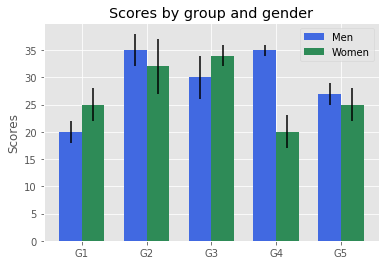

In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='royalblue', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, womenMeans, width, color='seagreen', yerr=womenStd)

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

In [17]:
file = "accents"
Q = pd.read_excel(f"C:/Documents/Python Programs (xlsx)/{file}.xlsx")
Q = Q.values.tolist()
print(Q)

[['a1', 'ā'], ['a2', 'á'], ['a3', 'ǎ'], ['a4', 'à'], ['e1', 'ē'], ['e2', 'é'], ['e3', 'ě'], ['e4', 'è'], ['i1', 'ī'], ['i2', 'í'], ['i3', 'ǐ'], ['i4', 'ì'], ['o1', 'ō'], ['o2', 'ó'], ['o3', 'ǒ'], ['o4', 'ò'], ['u1', 'ū'], ['u2', 'ú'], ['u3', 'ǔ'], ['u4', 'ù'], ['u5', 'ǖ'], ['u6', 'ǘ'], ['u7', 'ǚ'], ['u8', 'ǜ']]


In [18]:
accents = pd.read_excel(f"C:/Documents/Python Programs (xlsx)/accents.xlsx")

accents_input_list = accents["input_string"].to_list()

accents_dict = accents.set_index("input_string").to_dict()["output_string"]

print(accents)
print(accents.tail(100))
print(accents_dict)

   input_string output_string
0            a1             ā
1            a2             á
2            a3             ǎ
3            a4             à
4            e1             ē
5            e2             é
6            e3             ě
7            e4             è
8            i1             ī
9            i2             í
10           i3             ǐ
11           i4             ì
12           o1             ō
13           o2             ó
14           o3             ǒ
15           o4             ò
16           u1             ū
17           u2             ú
18           u3             ǔ
19           u4             ù
20           u5             ǖ
21           u6             ǘ
22           u7             ǚ
23           u8             ǜ
   input_string output_string
0            a1             ā
1            a2             á
2            a3             ǎ
3            a4             à
4            e1             ē
5            e2             é
6            e3             ě
7         